# Exercise 0: Preliminaries and FORTRAN

## 0.a The linear decay (evolution) equation - Python 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Analytic solution of
$$\dfrac{dT}{dt} = -\alpha T + F$$
is 
$$T(t) = F/\alpha + \Delta T \exp(-\alpha t)$$

In [2]:
def analytic_sol_T(t,alpha,F,deltaT):
    """analytic solution of T""" 
    return F/alpha+ deltaT *np.exp(-alpha*t)

In [3]:
F =  1
a = 0.05
deltaT = 0
timesteps = 1
t = np.linspace(0,200,num=200)*timesteps

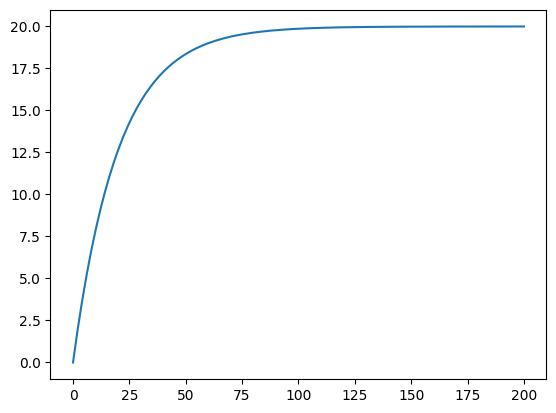

In [4]:
plt.plot(t,analytic_sol_T(t,a,F,-F/a))

## Exercise 1.1: Solve with Euler scheme

In [5]:
def num_sol(t,alpha,F,deltaT):
    Tn = np.zeros(len(t))
    Tn[0] = float(deltaT)
    for i in range(len(t)-1):
        delta_t = t[i+1]-t[i]
        Tn[i+1] = Tn[i] -delta_t*(alpha*Tn[i]-F)
    return Tn

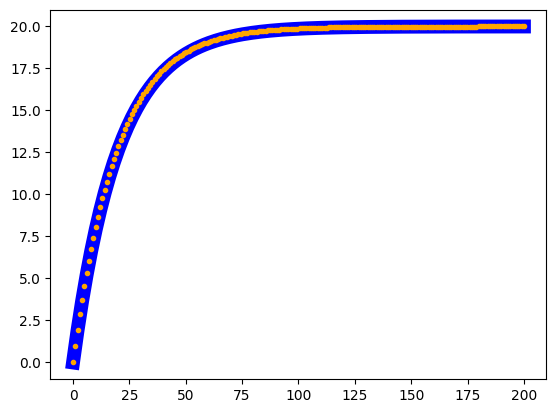

In [6]:
plt.plot(t,analytic_sol_T(t,a,F,-F/a),color='blue',linewidth=10)
plt.plot(t,num_sol(t,a,F,0),marker = '.',color='orange',linewidth=0)
plt.show()

### 1.1a: RMS bestimmen

In [7]:
rms_vec = analytic_sol_T(t,a,F,-F/a) -num_sol(t,a,F,0)

In [8]:
def RMS(x):
    return np.sqrt(np.vdot(x,x)/x.size)

In [9]:
RMS(rms_vec)

0.08044759568611003

In [10]:
timesteps = np.linspace(20,400,num=200,dtype= np.int32)

In [11]:
err = np.zeros(len(timesteps))
k = 0
for ts in timesteps:
    t = np.linspace(1,200,num=ts)
    rms_vec = analytic_sol_T(t,a,F,-F/a) -num_sol(t,a,F,0.0)
    err[k] = RMS(rms_vec)
    k += 1

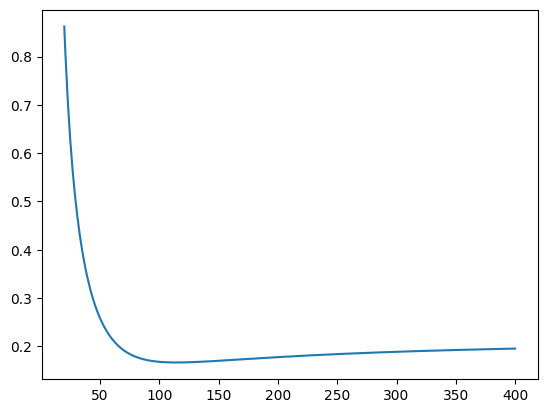

In [12]:
plt.plot(timesteps,err)
#plt.xscale("log")

## 0.a The linear decay (evolution) equation - Fortran 

In [13]:
#!gfortran fortran/all_kinds.f03 fortran/0a_evolution_equation.f03

In [14]:
#!fortran/a.out

In [18]:
import pandas as pd

df = pd.read_csv(r'fortran/output_0a.csv')
df

,time,values
0,0.000000,0.000000
1,0.200000,0.199003
2,0.400000,0.396027
3,0.600000,0.591089
4,0.800000,0.784211
...,...,...
995,199.000001,19.999045
996,199.199998,19.999055
997,199.399996,19.999064
998,199.600005,19.999073


<AxesSubplot: xlabel='time'>

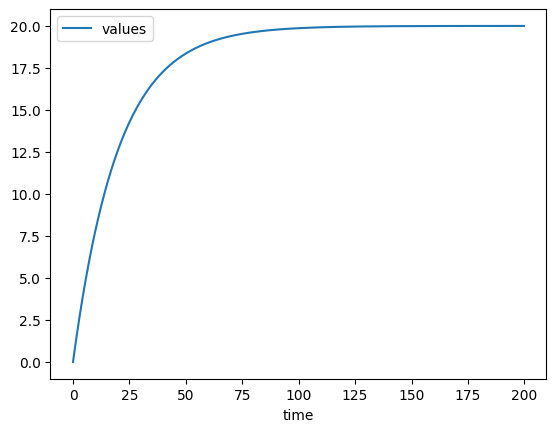

In [19]:
df.plot(x = 'time', y = 'values')

## 0b The linear advection equation:

Advective processes play a major role in fluid dynamics. Thus numerical schemes for discretisation in time and space are introduced utilizing the (one-dimensional) linear advection equation

$$\frac{\partial T}{\partial t} = - u \frac{\partial T}{\partial x} $$
with constant velocity $u$. The analytic solution of this equation is given by $T(x,t) = f(x-u,t)$, with any function $f(x-ut)$. In our case, $f$ should be given by a super-position of waves with wavenumber $k$ (and phase velocity $u$):
$$T(x,t) = \sum_{k} \text{Re} \left(T_k \exp (ik(x-ut))\right)$$

### Task:
Write a FORTRAN program, which 

In [22]:
df = pd.read_csv(r'fortran/output_0b.csv')
df

,time,values
0,0.00,10.000000
1,0.01,9.950042
2,0.02,9.800666
3,0.03,9.553365
4,0.04,9.210610
...,...,...
96,0.96,-9.846879
97,0.97,-9.623649
98,0.98,-9.304263
99,0.99,-8.891912


<AxesSubplot: xlabel='time'>

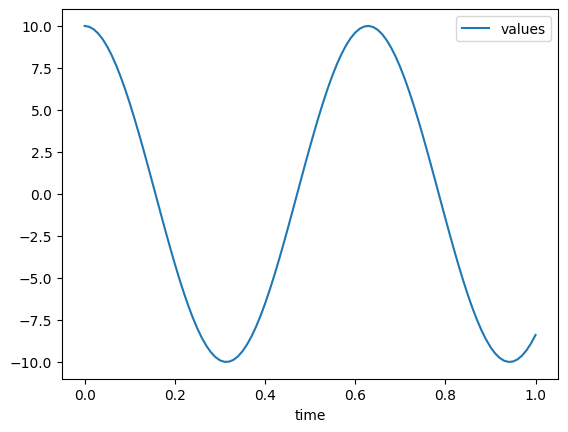

In [23]:
df.plot(x = 'time', y = 'values')